In [ ]:
import numpy as np
import random
import matplotlib.pylab as plt
import os
%matplotlib inline

In [7]:
main_path = 'C:\\Users\\Uday Aalto Account\\OneDrive - Aalto University\\Documents\\mumax\\magnonic_device'
analysis_path = '\Digit_GA\Digit_GA_with_3_arms'
os.chdir(main_path+analysis_path)
filename  = 'G0s0f0.out\m000005.ovf'

In [8]:
def readfiles(filename):
    with open(filename ,'r') as file:
        lines = file.read()
    lines  = lines.split('\n')
    xcell  = int(lines[20].split(' ')[2])
    ycell  = int(lines[21].split(' ')[2])
    zcell  = int(lines[22].split(' ')[2])
    xstepsize = float(lines[23].split(' ')[2])
    ystepsize = float(lines[24].split(' ')[2])
    zstepsize = float(lines[25].split(' ')[2])
    lines = lines[28:-3]
    tempx = np.array(range(0,xcell))
    tempy = np.array(range(0,ycell))
    tempz = np.array(range(0,zcell))
    return xcell, ycell, zcell, xstepsize, ystepsize \
           ,zstepsize, tempx, tempy, tempz, lines

In [9]:
xcell, ycell, zcell, xstepsize, ystepsize \
           ,zstepsize, tempx, tempy, tempz, lines = readfiles(filename)
mx, my, mz = [],[],[]
for ii in lines:
    A = ii.split(' ')
    mx.append(float(A[0]))
    my.append(float(A[1]))
    mz.append(float(A[2]))

mx = np.array(mx)
my = np.array(my)
mz = np.array(mz)

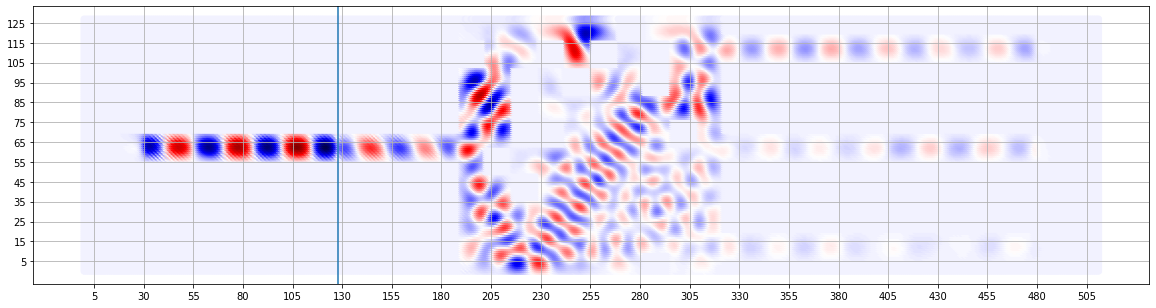

In [13]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
layer = 0
x,y,z = np.meshgrid(tempx, tempy, tempz)
ax.set_aspect('equal')
z = my#np.sqrt(mx**2+my**2)
ax.scatter(x,y, c=z.flat, cmap=plt.cm.get_cmap('seismic', 200))
ax.axvline(128)
#ax.axvline(50)
#ax.axvline(462)
major_xticks = np.arange(5, xcell, 25)
#minor_xticks = np.arange(0, xcell, 5)
major_yticks = np.arange(5, ycell, 10)
#minor_yticks = np.arange(0, ycell, 5)

ax.set_xticks(major_xticks)
#ax.set_xticks(minor_xticks, minor=True)
ax.set_yticks(major_yticks)
#ax.set_yticks(minor_yticks, minor=True)


ax.grid(which='both')
#ax.grid(which='minor', alpha=0.2)
#ax.grid(which='major', alpha=0.5, color='k')
#ax.set_ylim(95,105)

In [32]:
croped_mx = (np.reshape(mx, (len(tempy), len(tempx))))
croped_my = (np.reshape(my, (len(tempy), len(tempx))))
croped_mz = (np.reshape(mz, (len(tempy), len(tempx))))

(-0.05, 0.05)

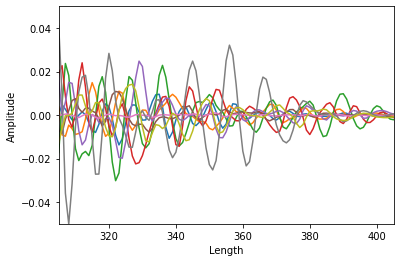

In [33]:
#plt.plot(np.sqrt(croped_my[47,:]**2+croped_mx[47,:]**2))
#plt.plot(np.sqrt(croped_my[12,:]**2+croped_mx[12,:]**2))
#plt.plot(croped_mx[40,:])
#plt.plot(croped_my[12,:], label='Top arm')
#plt.plot(croped_my[45,:], label='Bottom arm')
plt.plot(croped_my[19,:], label='Output arm 1')
plt.plot(croped_my[31,:], label='Output arm 2')
plt.plot(croped_my[41,:], label='Output arm 3')
plt.plot(croped_my[53,:], label='Output arm 4')
plt.plot(croped_my[63,:], label='Output arm 4')
plt.plot(croped_my[74,:], label='Output arm 4')
plt.plot(croped_my[85,:], label='Output arm 4')
plt.plot(croped_my[96,:], label='Output arm 4')
plt.plot(croped_my[107,:], label='Output arm 4')

plt.xlabel('Length')
plt.ylabel('Amplitude')
#plt.legend()
plt.xlim(305,405)
plt.ylim(-0.05,0.05)

In [55]:
len(np.sqrt(croped_my[47,:]**2+croped_mx[47,:]**2))

512

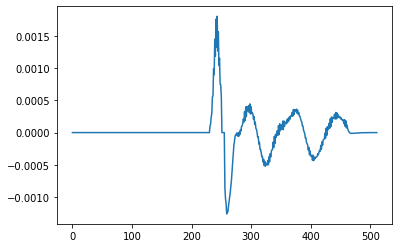

In [124]:
#plt.plot(croped_my[60,:])
#plt.plot(croped_my[12,:])
plt.plot(croped_my[45,:])
#plt.plot(croped_my[34,:])
#plt.xlim(300, 400)

In [125]:
x = np.linspace(1, 512, 512)
y = np.linspace(1, 64, 64)

In [89]:
len(tempy)

64

In [126]:
X, Y = np.meshgrid(x, y)
Z = croped_my

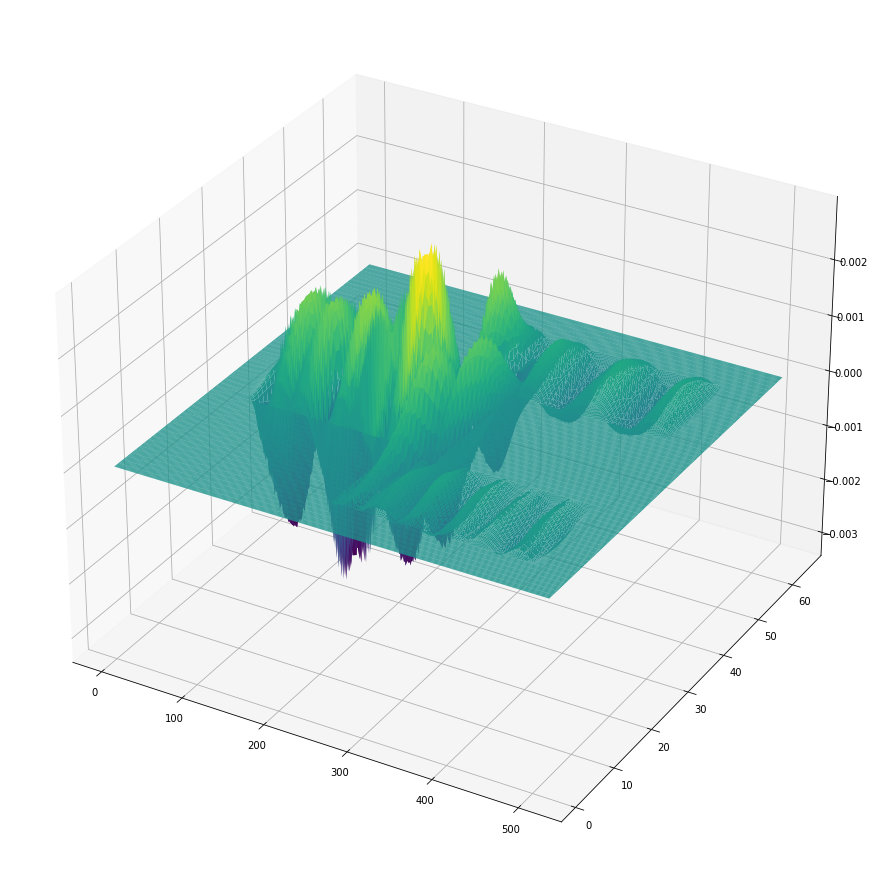

In [127]:
fig = plt.figure(figsize=(18,16))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.view_init(60, 35)
#ax.set_xlim(128,230)
#ax.set_ylim(22,42)
#fig

In [ ]:
(croped_my[47,300:450]);
import pandas as pd
df = pd.DataFrame()
df['amplitude']=croped_my[47,300:450]

In [11]:
def readfiles(filename):
    with open(filename ,'r') as file:
        lines = file.read()
    lines  = lines.split('\n')
    return lines

In [ ]:
def dispersion(u0, H, Msat, gama, A, k, tf, pi=22/7):
    return( (gama*u0/(2*pi))*np.sqrt((H-Msat + (2*A*k**2)/(u0*Msat))*(H+(2*A*k**2)/(u0*Msat))- Msat*(1-np.exp(-k*tf))/(k*tf) ))

In [ ]:
def dispersion(u0, B, Msat, gama, A, k, tf, pi=22/7):
    aa = 0.028*1e9 #ghz
    bb = (B-u0*Msat + (2*A*k**2)/Msat)
    cc = (B + (2*A*k**2)/Msat - u0*Msat*(1-np.exp(-k*tf))/(k*tf))
    dd = aa*np.sqrt(bb*cc)
    return dd

In [ ]:
test = dispersion(u0=1.256e-6, B=200, uoMsat=176, gama=1.76e+11, A=3.5e-12, k=2*3.14/(100e-9), tf=100e-9, pi=22/7)

In [ ]:
disp = []
wave = []
for ii in (np.linspace(200, 1000, 50)):
    fr = dispersion(u0=1.256e-6, B=0.2, Msat=14e4, gama=1.76e+11, A=3.5e-12, k=2*3.14/(ii*1e-9), tf=100e-9, pi=22/7)
    wave.append(2*3.14/(ii*1e-9))
    disp.append(fr)

In [ ]:
plt.plot(wave, disp, '+')
plt.xlabel 

(300.0, 420.0)

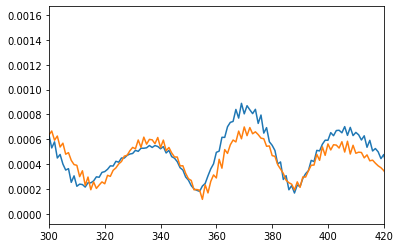

In [19]:
plt.plot(np.sqrt(croped_my[47,:]**2+croped_mx[47,:]**2))
plt.plot(np.sqrt(croped_my[12,:]**2+croped_mx[12,:]**2))
plt.xlim(300,420)

In [51]:
from scipy.fft import fft
x = np.array(np.sqrt(croped_my[47,300:420]**2+croped_mx[47,300:420]**2))
y = fft(x)

C:\Users\Uday Aalto Account\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


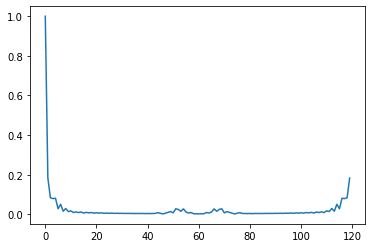

In [53]:
plt.plot(abs(y)/max(y))